# Function

In [612]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    plt.grid(False)
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [613]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [614]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : courses, 'value' : values}
    data = pd.DataFrame(data, index=courses)
    print(data)
    
    ax = data.plot(kind='bar', figsize=(3,3), color='maroon', legend=False, rot=0)
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of sample data")
    ax.grid(True, zorder=0)
    ax.set_axisbelow(True)

    plt.show()

# โหลดชุดข้อมูล

In [615]:
import helpers
X, y = helpers.get_data()

In [616]:
classes = ['lived', 'died', 'euthanized']

# Feature selection for classification

## Numerical feature 

Use LDA

In [617]:
feature_num = ['temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
X_num_feature = X[feature_num].copy()

In [618]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_num_select = lda.fit_transform(X_num_feature, y)

In [619]:
print('Original numerical feature number:', X_num_feature.shape[1])
print('Reduced numerical feature number:', X_num_select.shape[1])

Original numerical feature number: 6
Reduced numerical feature number: 2


## Nominal feature

Use Chi square

In [620]:
feature_nom = [i for i in np.array(X.columns) if i not in np.array(feature_num)]
X_nom_feature = X[feature_nom].copy()

In [621]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=15)
X_nom_select = chi2_features.fit_transform(X_nom_feature, y)

In [622]:
chi2_features.get_feature_names_out()

array(['surgery', 'age', 'temp_of_extremities', 'capillary_refill_time',
       'pain', 'peristalsis', 'abdominal_distention', 'rectal_exam_feces',
       'abdomen', 'abdomo_appearance', 'surgical_lesion', 'lesion_site',
       'lesion_type', 'lesion_subtype', 'lesion_code'], dtype=object)

In [623]:
print('Original nominal feature number:', X_nom_feature.shape[1])
print('Reduced nominal feature number:', X_nom_select.shape[1])

Original nominal feature number: 20
Reduced nominal feature number: 15


In [624]:
X_num_select.shape, X_nom_select.shape

((299, 2), (299, 15))

รวม Numerical feature และ nominal feature ที่ได้ทำการ feature selection แล้ว

In [625]:
X_select = np.concatenate([X_num_select, X_nom_select], axis=1)

In [626]:
X_select.shape

(299, 17)

# แยกข้อมูลฝึก/ทดสอบ

In [627]:
# split data
from sklearn.model_selection import train_test_split
# X_select || X
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2)

# ตัวแปรควบคุม

In [628]:
from matplotlib import pyplot as plt

In [629]:
result = {
    'model' : [],
    'accuarcy' : [],
    'recall' : [],
    'F1' : [],
    'precision' : []
}

In [630]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics

def bulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=30)
    clf = dtree.fit(X_train, y_train)  
    pred = clf.predict(X=X_test)  
    result['model'].append(clf)
    result['accuarcy'].append(metrics.accuracy_score(y_test, pred))
    result['recall'].append(metrics.recall_score(y_test, pred, average='weighted'))
    result['F1'].append(metrics.f1_score(y_test, pred, average='weighted'))
    result['precision'].append(metrics.precision_score(y_test, pred, average='weighted'))

    return clf, pred

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึกที่ยังไม่ได้ sampling

                 class  value
lived            lived     59
died              died     34
euthanized  euthanized    146


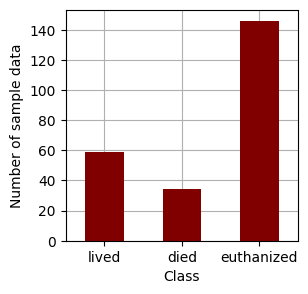

In [631]:
plotBarChart(classes, y_train)

In [632]:

model_1, y_pred_1 = bulidAndTrainModel(X_train, y_train)
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.61      0.73      0.67        15
        died       0.60      0.43      0.50        14
  euthanized       0.78      0.81      0.79        31

    accuracy                           0.70        60
   macro avg       0.66      0.66      0.65        60
weighted avg       0.70      0.70      0.69        60



[Text(0.44114583333333335, 0.95, 'x[0] <= -0.321\nentropy = 1.333\nsamples = 239\nvalue = [59, 34, 146]'),
 Text(0.14479166666666668, 0.85, 'x[1] <= -0.898\nentropy = 1.423\nsamples = 84\nvalue = [46, 14, 24]'),
 Text(0.03333333333333333, 0.75, 'x[0] <= -1.22\nentropy = 0.954\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.016666666666666666, 0.65, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.05, 0.65, 'x[0] <= -0.643\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.03333333333333333, 0.55, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.06666666666666667, 0.55, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25625, 0.75, 'x[2] <= 0.5\nentropy = 1.316\nsamples = 76\nvalue = [46, 9, 21]'),
 Text(0.14166666666666666, 0.65, 'x[0] <= -1.362\nentropy = 1.499\nsamples = 25\nvalue = [12, 8, 5]'),
 Text(0.1, 0.55, 'x[13] <= 6.0\nentropy = 0.863\nsamples = 14\nvalue = [10, 4, 0]'),
 Text(0.08333333333333333, 0.45, 'x[16] <= 6.0\nentropy = 0.65\nsamples = 1

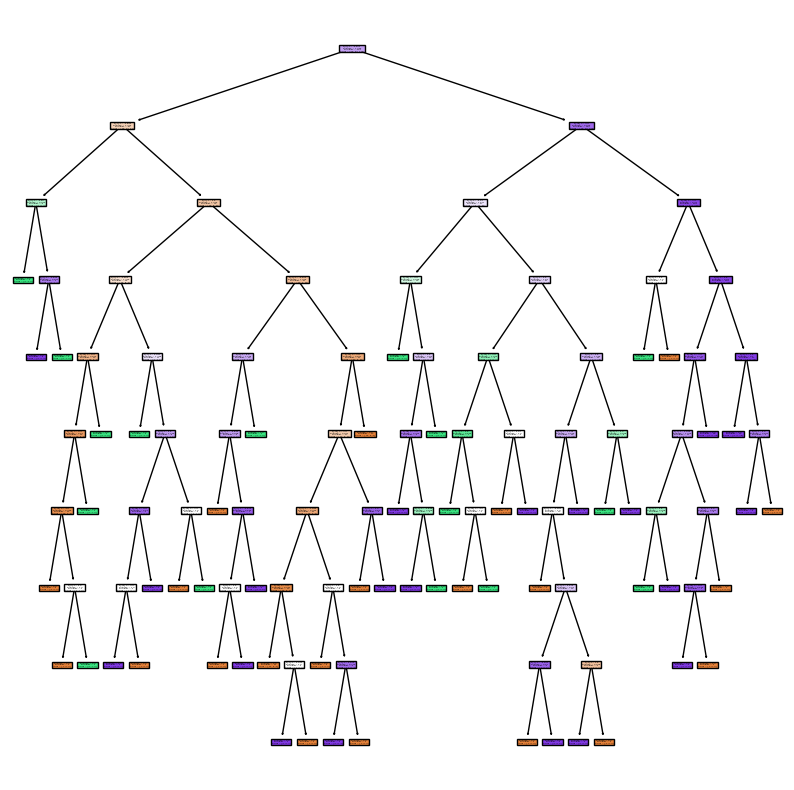

In [633]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

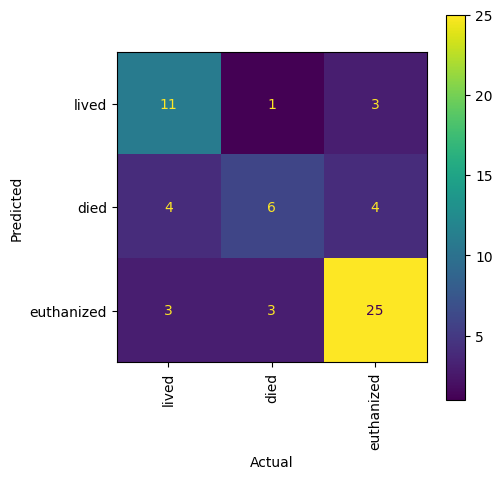

In [634]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

# การทดลองที่ 2 

การทดลองเพื่อแก้ปัญหา Imblance dataset

## Random sampling

In [635]:
from imblearn.over_sampling import RandomOverSampler

res = RandomOverSampler(random_state=42)
X_res_random,y_res_random = res.fit_resample(X_train,y_train)

                 class  value
lived            lived    146
died              died    146
euthanized  euthanized    146


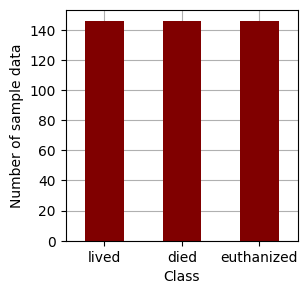

In [636]:
plotBarChart(classes, y_res_random)

In [637]:
model_randoms, y_pred_res_rand = bulidAndTrainModel(X_res_random, y_res_random)
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.62      0.44      0.52        18
        died       0.38      0.30      0.33        10
  euthanized       0.67      0.81      0.73        32

    accuracy                           0.62        60
   macro avg       0.55      0.52      0.53        60
weighted avg       0.60      0.62      0.60        60



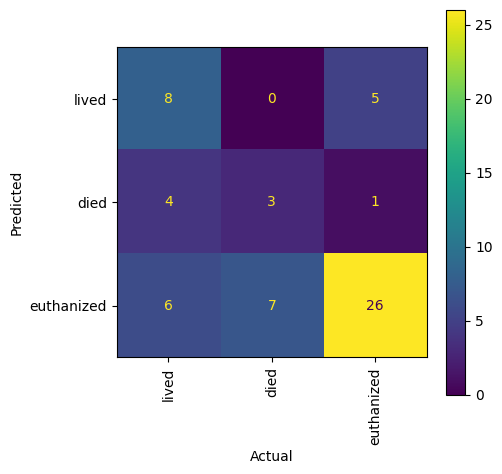

In [638]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [639]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

                 class  value
lived            lived    146
died              died    146
euthanized  euthanized    146


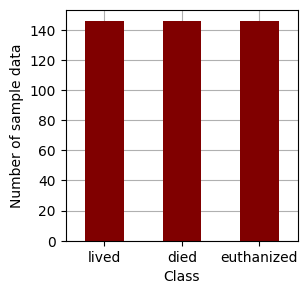

In [640]:
plotBarChart(classes, y_resampled_smote)

In [641]:
model_smote, y_pred_smote = bulidAndTrainModel(X_resampled_smote, y_resampled_smote)
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.44      0.67      0.53        12
        died       0.30      0.25      0.27        12
  euthanized       0.75      0.67      0.71        36

    accuracy                           0.58        60
   macro avg       0.50      0.53      0.50        60
weighted avg       0.60      0.58      0.58        60



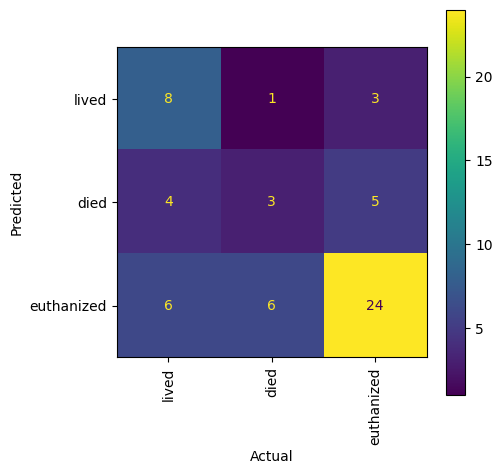

In [642]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [643]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [644]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

                 class  value
lived            lived     47
died              died     34
euthanized  euthanized    132


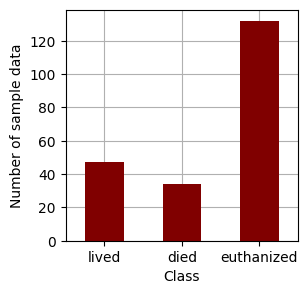

In [645]:
plotBarChart(classes, y_res_tomek)

In [646]:
model_tomek, y_pred_tomek = bulidAndTrainModel(X_res_tomek, y_res_tomek)
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.69      0.50      0.58        18
        died       0.35      0.60      0.44        10
  euthanized       0.90      0.84      0.87        32

    accuracy                           0.70        60
   macro avg       0.65      0.65      0.63        60
weighted avg       0.75      0.70      0.71        60



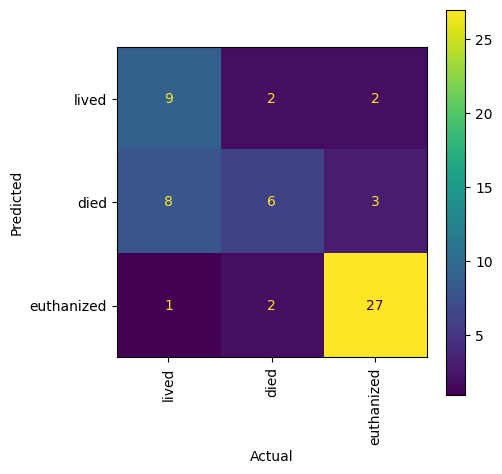

In [647]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [648]:
from imblearn.over_sampling import ADASYN

In [649]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

                 class  value
lived            lived    151
died              died    142
euthanized  euthanized    146


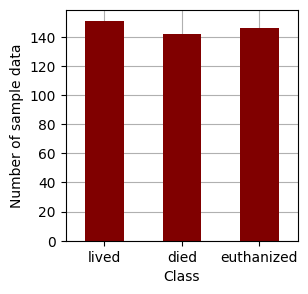

In [650]:
plotBarChart(classes, y_res_adasyn)

In [651]:
model_adasyn, y_pred_adasyn = bulidAndTrainModel(X_res_adasyn, y_res_adasyn)
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.73      0.44      0.55        18
        died       0.25      0.30      0.27        10
  euthanized       0.65      0.75      0.70        32

    accuracy                           0.58        60
   macro avg       0.54      0.50      0.51        60
weighted avg       0.61      0.58      0.58        60



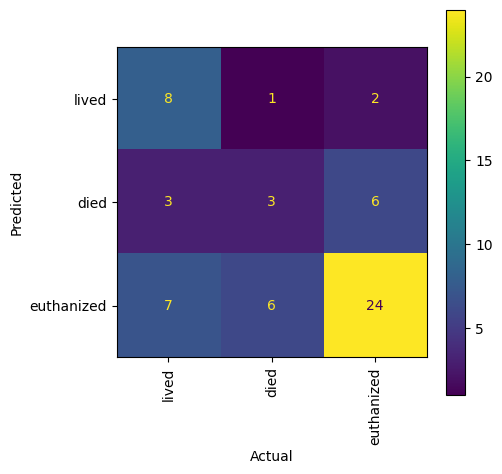

In [652]:
plotCM(y_test, y_pred_adasyn, classes)

## สรุปผลการทดลอง

In [653]:
index = ['On sampling', 'Random', 'SMOT', 'TOMEK', 'ADASYN']

ls_reslut_pred = [
    y_pred_1,
    y_pred_res_rand,
    y_pred_smote,
    y_pred_tomek,
    y_pred_adasyn ,
]

เปรียบเทียบประสิทธิภาพโมเดลที่เรียนรู้กับชุดข้อมูลที่มีการ sampling ต่างกัน

In [654]:
data_scores = pd.DataFrame(
    data={
    'accuarcy' : result['accuarcy'],
    'recall' : result['recall'],
    'F1' : result['F1'],
    'precision' : result['precision']
    }, index=index)

data_scores

,accuarcy,recall,F1,precision
On sampling,0.700000,0.700000,0.706614,0.721536
Random,0.616667,0.616667,0.601005,0.602671
SMOT,0.583333,0.583333,0.581925,0.597222
TOMEK,0.700000,0.700000,0.712784,0.746516
ADASYN,0.583333,0.583333,0.581986,0.605794


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the performance of all models.'}>>

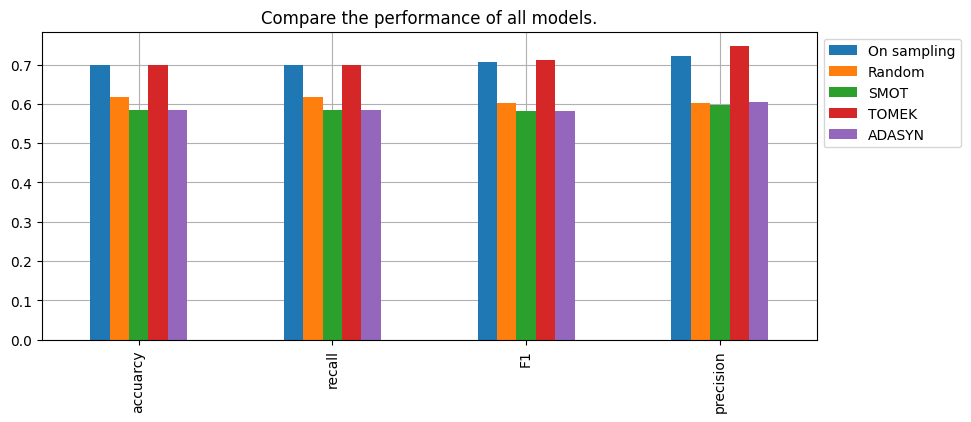

In [655]:
# performance บน test set
ax = data_scores.T.plot(kind='bar', figsize=(10,4))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the performance of all models.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot

จากผลลัพธ์ข้างต้นจะพบบว่า การทำ Oversampling โดยใช้ algolithm ADASYN ให้ประสิทธิภาพโมเดลสูงที่สุด

# การทดลองที่ 3

การทดลองปรับจูนโมเดลเพื่อหา Parameter ที่ส่งผลให้โมเดลมีประสิทธิภาพมากที่สุด

In [659]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [660]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

def gridSearchCVbulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, scoring='accuracy')
    dtree_gscv.fit(X_train, y_train)    
    print('best params : {}'.format(dtree_gscv.best_params_))
    print('best score : {}'.format(dtree_gscv.best_score_))

    return dtree_gscv.best_estimator_

In [662]:
dtree_cv = gridSearchCVbulidAndTrainModel(X_res_tomek, y_res_tomek)

best params : {'criterion': 'gini', 'max_depth': 3}
best score : 0.7272727272727273
